In [15]:
import cv2
import matplotlib.pyplot as plt

import imutils

from IPython.display import Image

In [2]:
image = cv2.imread(r'data\Training\glioma\Tr-gl_0011.jpg')

# convert to grayscale
img_gray =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gaussian blur to  clean the smooth edges and clean small noise
img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)

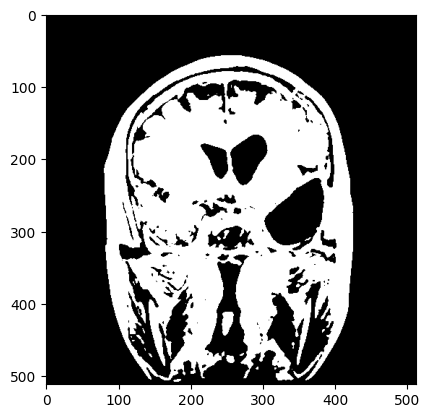

In [9]:
# converting img to black-and-white
# pixel intensities >45 -> 255, rest -> 0
img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
plt.imshow(img_thresh, cmap='gray')

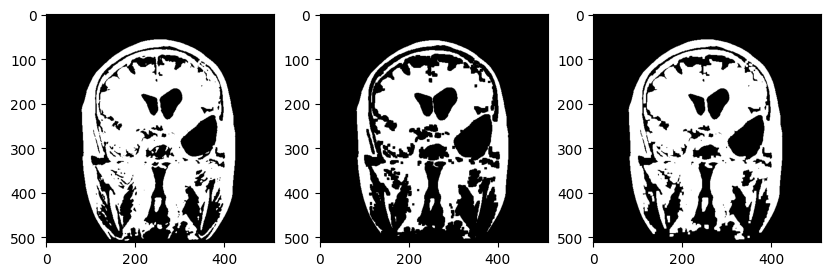

In [10]:
# erosion + dilation
img_thresh1 = cv2.erode(img_thresh, None, iterations=2)
img_thresh2 = cv2.dilate(img_thresh1, None, iterations=2)

f, ax = plt.subplots(1, 3, figsize=(10, 8))
ax[0].imshow(img_thresh, cmap='gray')
ax[1].imshow(img_thresh1, cmap='gray')
ax[2].imshow(img_thresh2, cmap='gray')

* erosion: removes small white noise (shrinks white regions)
* dilation: expands the white regionsback to original size

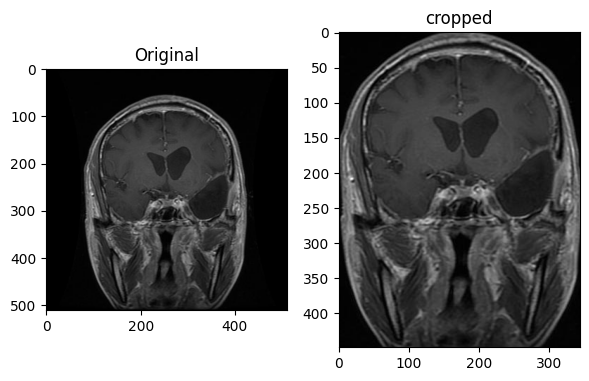

In [23]:
# find countours

# only get the outermost contours - RETR_EXTERNAL
contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# for compatibility bw opencv versions
contours = imutils.grab_contours(contours)

# select the largest contour (assumed to be the main obj in the image i.e. the skull)
c = max(contours, key=cv2.contourArea)

# get extreme points
Left = tuple(c[c[:, :, 0].argmin()][0])
Right = tuple(c[c[:, :, 0].argmax()][0])
Top = tuple(c[c[:, :, 1].argmin()][0])
Bottom = tuple(c[c[:, :, 1].argmax()][0])

# crop the region (giving the co-ordinates)
new_img = image[Top[1]:Bottom[1], Left[0]:Right[0]]

f, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].imshow(image, cmap='gray')
ax[1].imshow(new_img, cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('cropped')
plt.tight_layout()
plt.show()

In [26]:
print(f'Left: {Left} \nRight: {Right} \nTop: {Top} \nBottom: {Bottom}')

Left: (np.int32(80), np.int32(213)) 
Right: (np.int32(424), np.int32(328)) 
Top: (np.int32(242), np.int32(57)) 
Bottom: (np.int32(163), np.int32(506))
